In [1]:
# importing libraries for data preprocessing
import pandas as pd

# import libraries for plotting
import cufflinks as cf
import plotly.offline
from  plotly.offline import plot_mpl
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# importing arima model
from pyramid.arima import auto_arima

# import libraries for error metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



In [2]:
# data preprocessing
# reading dataset
data = pd.read_csv("upsldc.csv",index_col=0)
data = data[674:1050]
data.head()


,Schedule(MW),Drawl(MW),OD/UD(MW),Demand(MW),Total SSGS(MW),UP Thermal Generation (MW),IPP Thermal Generation (MW),UP Hydro Generation (MW),Co-gen/CPP Generation (MW),RE/Solar Generation (MW),Frequency (Hz),Deviation Rate (Paise/Unit)
Time Stamp,,,,,,,,,,,,
2019-04-24 10:17:04.681890,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03
2019-04-24 10:17:26.585791,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03
2019-04-24 10:17:38.545493,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03
2019-04-24 10:18:56.758521,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03
2019-04-24 10:19:19.920844,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03


In [3]:
# making column datetime
data.index = pd.to_datetime(data.index)
data.head()

,Schedule(MW),Drawl(MW),OD/UD(MW),Demand(MW),Total SSGS(MW),UP Thermal Generation (MW),IPP Thermal Generation (MW),UP Hydro Generation (MW),Co-gen/CPP Generation (MW),RE/Solar Generation (MW),Frequency (Hz),Deviation Rate (Paise/Unit)
Time Stamp,,,,,,,,,,,,
2019-04-24 10:17:04.681890,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03
2019-04-24 10:17:26.585791,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03
2019-04-24 10:17:38.545493,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03
2019-04-24 10:18:56.758521,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03
2019-04-24 10:19:19.920844,5798,5593,-205,14232,8639,3852,4001,416,600,31,49.92,551.03


In [4]:
# removing unwanted data
data = data['Demand(MW)']

# changing column type
data = data.astype('float64')

data.head()

Time Stamp
2019-04-24 10:17:04.681890    14232.0
2019-04-24 10:17:26.585791    14232.0
2019-04-24 10:17:38.545493    14232.0
2019-04-24 10:18:56.758521    14232.0
2019-04-24 10:19:19.920844    14232.0
Name: Demand(MW), dtype: float64

In [5]:
#create train/test datasets
train = data[:int((70*len(data)/100))]
valid = data[int((70*len(data)/100)):]
len(data)

376

In [6]:
#plotting the data 

data.iplot(title="power")

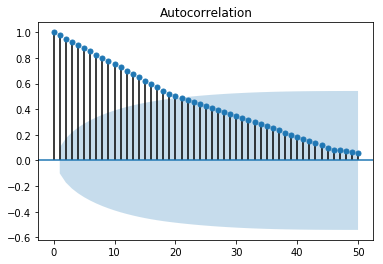

In [7]:
# plotting auto correllation function values
plot_acf(data, lags=50)
pyplot.show()

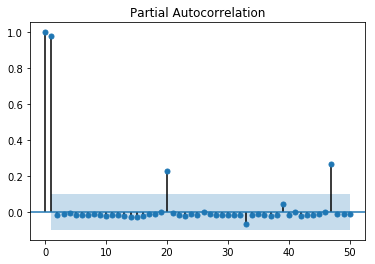

In [8]:
# plotting partial auto correlation function values
plot_pacf(data, lags=50)
pyplot.show()

In [9]:
#train the arima model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, m=24)
model.fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 24); AIC=3665.629, BIC=3694.175, Fit time=17.364 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 24); AIC=3656.702, BIC=3663.839, Fit time=0.190 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 24); AIC=3660.666, BIC=3674.939, Fit time=0.806 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 24); AIC=3660.692, BIC=3674.965, Fit time=0.764 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 24); AIC=3658.699, BIC=3669.404, Fit time=0.545 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 24); AIC=3658.696, BIC=3669.401, Fit time=0.725 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 24); AIC=3659.948, BIC=3674.221, Fit time=5.553 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 24); AIC=3658.669, BIC=3669.374, Fit time=0.083 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 24); AIC=3658.697, BIC=3669.402, Fit time=0.051 seconds
Fit ARIMA: order=(1, 1, 1) 

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 24), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [10]:
# make predictions 
future_forecast = model.predict(n_periods=len(valid))
train_forecast = model.predict(n_periods=len(train))

future_forecast


array([15551.01526718, 15556.03053435, 15561.04580153, 15566.0610687 ,
       15571.07633588, 15576.09160305, 15581.10687023, 15586.1221374 ,
       15591.13740458, 15596.15267176, 15601.16793893, 15606.18320611,
       15611.19847328, 15616.21374046, 15621.22900763, 15626.24427481,
       15631.25954198, 15636.27480916, 15641.29007634, 15646.30534351,
       15651.32061069, 15656.33587786, 15661.35114504, 15666.36641221,
       15671.38167939, 15676.39694656, 15681.41221374, 15686.42748092,
       15691.44274809, 15696.45801527, 15701.47328244, 15706.48854962,
       15711.50381679, 15716.51908397, 15721.53435115, 15726.54961832,
       15731.5648855 , 15736.58015267, 15741.59541985, 15746.61068702,
       15751.6259542 , 15756.64122137, 15761.65648855, 15766.67175573,
       15771.6870229 , 15776.70229008, 15781.71755725, 15786.73282443,
       15791.7480916 , 15796.76335878, 15801.77862595, 15806.79389313,
       15811.80916031, 15816.82442748, 15821.83969466, 15826.85496183,
      

In [11]:
# create a comparison dataframe
future_forecast = pd.DataFrame(future_forecast,index = valid.index,columns=['Prediction'])
train_forecast = pd.DataFrame(train_forecast,index = train.index,columns=['Prediction'])
pd.concat([valid,future_forecast],axis=1).iplot(title="Prediction",xTitle='TIme Stamp',yTitle='Demand')

In [12]:
# plotting whole dataset with predictions
pd.concat([data,future_forecast],axis=1).iplot()

In [13]:
#  printing r2 score of our model 
rms = sqrt(mean_squared_error(valid,future_forecast))
print(rms)

1780.713901412104


In [14]:
#  printing mean square error of our model 
r2 = r2_score(valid,future_forecast)
r2

-0.22926840426383022